# Importing Libraries

In [24]:
import numpy as np 
import pandas as pd 
import os
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import warnings
import json

import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.express as px

import squarify
from sklearn import manifold

## Importing Datasets

In [25]:
ks = pd.read_csv("key_stats.csv")
gl = pd.read_csv("goals.csv")
dfn = pd.read_csv("defending.csv")
atkg = pd.read_csv("attacking.csv")
gk = pd.read_csv("goalkeeping.csv")
dsp = pd.read_csv("disciplinary.csv")
atm = pd.read_csv("attempts.csv")
dis = pd.read_csv("distributon.csv")

## Key Stats

### Descriptive Analysis

In [5]:
ks.head()

,player_name,club,position,minutes_played,match_played,goals,assists,distance_covered
0,Courtois,Real Madrid,Goalkeeper,1230,13,0,0,64.2
1,Vinícius Júnior,Real Madrid,Forward,1199,13,4,6,133.0
2,Benzema,Real Madrid,Forward,1106,12,15,1,121.5
3,Modrić,Real Madrid,Midfielder,1077,13,0,4,124.5
4,Éder Militão,Real Madrid,Defender,1076,12,0,0,110.4


- We have player name, their club, playing position, minutes - matches played, goals, assists and the distance covered. Lets look at the stats

In [6]:
ks.describe().T

,count,mean,std,min,25%,50%,75%,max
minutes_played,747.0,331.611780,248.371930,1.0,116.0,301.0,492.0,1230.0
match_played,747.0,5.089692,2.721425,1.0,3.0,5.0,7.0,13.0
goals,747.0,0.492637,1.313321,0.0,0.0,0.0,0.0,15.0
assists,747.0,0.376171,0.845502,0.0,0.0,0.0,0.0,7.0


- We have data of 747 players in total. Average laying time is 331 mins, about 5.5 hours.

In [7]:
ks.describe(include=['object']).T

,count,unique,top,freq
player_name,747,731,Martínez,3
club,747,32,Man. United,31
position,747,4,Midfielder,287
distance_covered,747,514,3.6,5


Most of the players are midfielders

### Number of goals scored per club

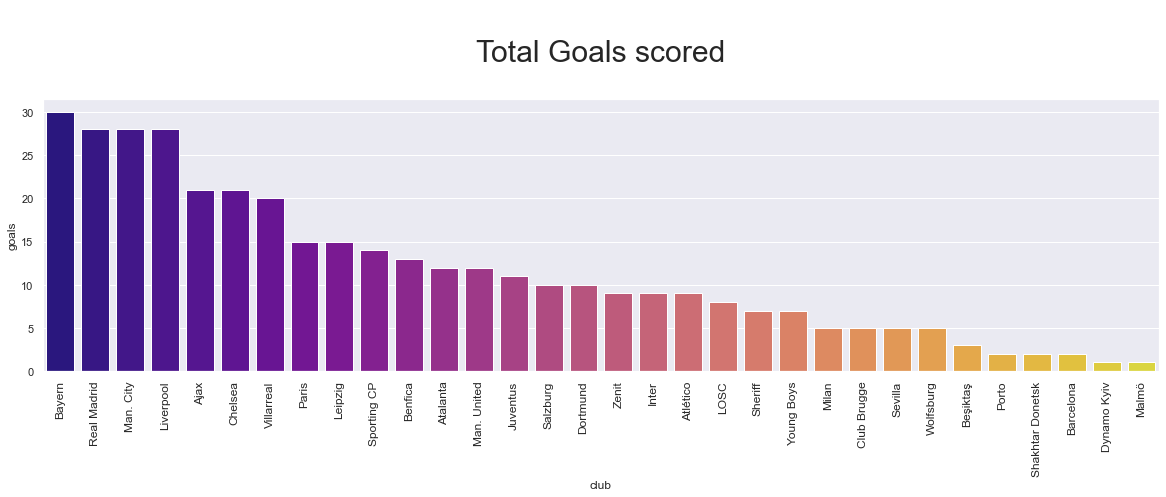

In [8]:
tks=ks.groupby('club',as_index = False)["goals"].sum().sort_values(by='goals',ascending=False)
sns.set(rc={'figure.figsize':(20,5)})
plt.xticks(fontsize=12,rotation='vertical')
p=sns.barplot(x="club", y="goals", data=tks,palette="plasma",capsize=.2)
p.axes.set_title("\nTotal Goals scored\n",fontsize=30);

- Bayern Scored most of the goals.
- The 2nd is the Champion Read Madrid.
- 3rd Mancheester City was Semi-finalist

**Number of goals scored per club Treemap**

In [26]:
fig = px.treemap(tks, path=['club'],values='goals', width=1200, height=400, title="\nTotal Goals scored per club")
fig.update_layout(
    margin = dict(t=50, l=25, r=25, b=25))
fig.show()

C:\Users\Ahmed Hussain\anaconda3\lib\site-packages\plotly\express\_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



## Average playing time per player per club

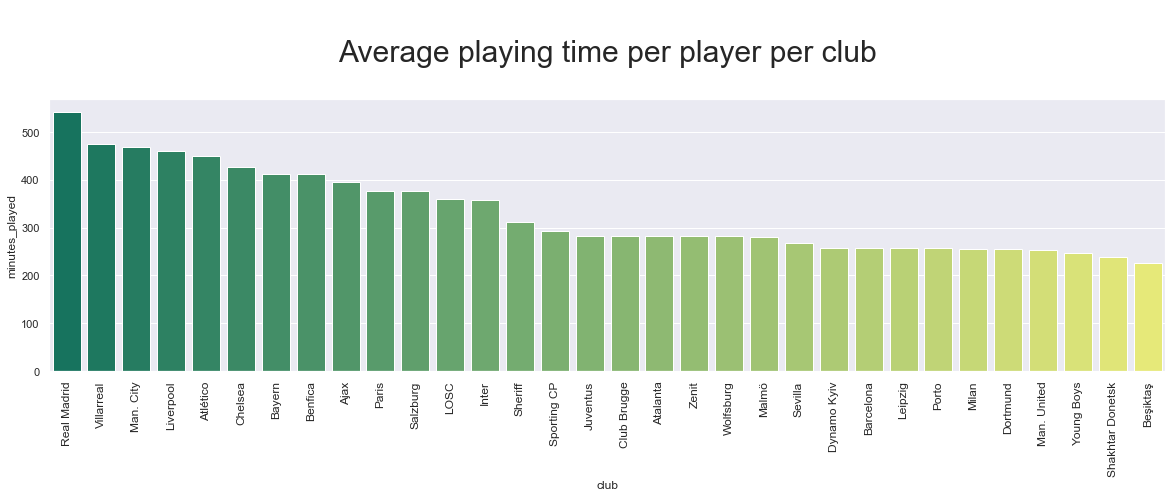

In [12]:
tks=ks.groupby('club',as_index = False)["minutes_played"].mean().sort_values(by='minutes_played',ascending=False)
sns.set(rc={'figure.figsize':(20,5)})
plt.xticks(fontsize=12,rotation='vertical')
p=sns.barplot(x="club", y="minutes_played", data=tks,palette="summer",capsize=.2)
p.axes.set_title("\nAverage playing time per player per club\n",fontsize=30);

- As RMA is finalist and played 2 extra times, average laying time per player should be higher; but it is substantially higher than another finalistt Liverpool (4th). So, the reason can be - RMA used less players in UCL, so each player player had to player longer than usual.

*Suggestion* - Playing time pressure should be reduced, and more player should be given place to perform.

## Top 10 Scorers

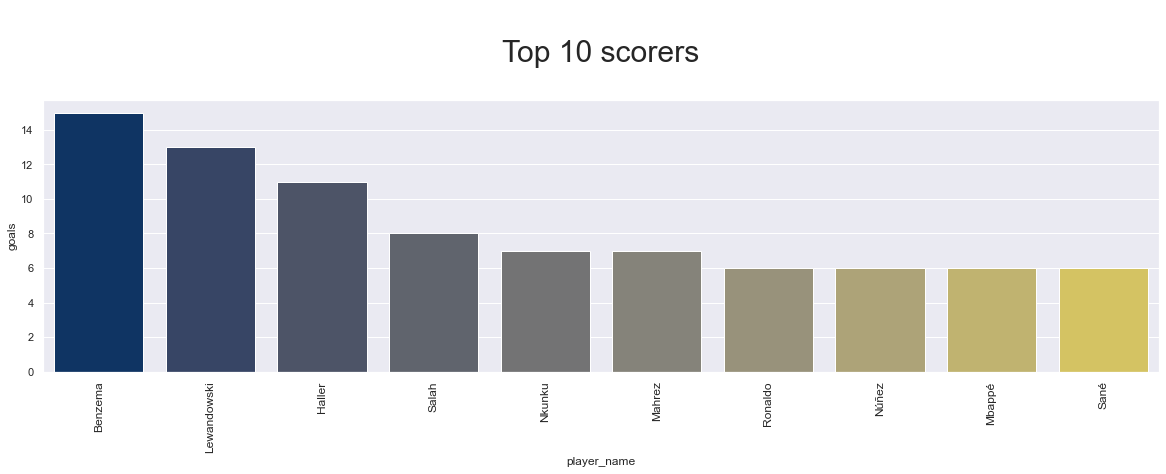

In [13]:
ks=ks.sort_values(by='goals',ascending=False)
tks=ks[:10]
sns.set(rc={'figure.figsize':(20,5)})
plt.xticks(fontsize=12,rotation='vertical')
p=sns.barplot(x="player_name", y="goals", data=tks,palette="cividis",capsize=2)
p.axes.set_title("\nTop 10 scorers\n",fontsize=30);

- Benzema from Chamion Real Madrid scoed Highest Number of goals.

*Insights* - Real madrid dominance as a finalist. Other finalist Liverpool is staying behind in all stats.

## Unsupervised Testing with TSNE (Goals)

C:\Users\Ahmed Hussain\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

C:\Users\Ahmed Hussain\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.

C:\Users\Ahmed Hussain\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



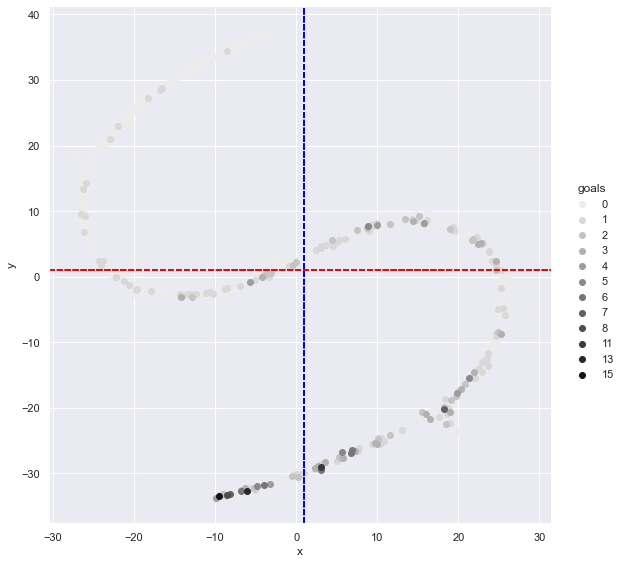

In [15]:
#relacing nulls with 0
ks=ks.replace(to_replace="-", value=0)

#TSNE class, 2 coomppotents for easy visualization
tsne = manifold.TSNE(n_components=2, random_state=42)

#transforming data
transformed_data = tsne.fit_transform(ks[["minutes_played","match_played","distance_covered"]])
tsne_df = pd.DataFrame(np.column_stack((transformed_data, ks["goals"])),columns=["x",'y',"goals"])
tsne_df.loc[:, "goals"] = tsne_df.goals.astype(int)

#plotting TSNE transformed data
sns.set(rc={'figure.figsize':(15,10)})
grid = sns.FacetGrid(tsne_df, hue="goals", size=8,palette='binary')
grid.map(plt.scatter, "x", "y").add_legend()
grid.refline(x=tsne_df["goals"].quantile(0.9), color='blue')
grid.refline(y=tsne_df["goals"].quantile(0.9), color='red');

Goals per matches played, minutes played and distance covered plays a nice relation with goals.

# Goal Analysis

## Top 15 Teams in terms of goals

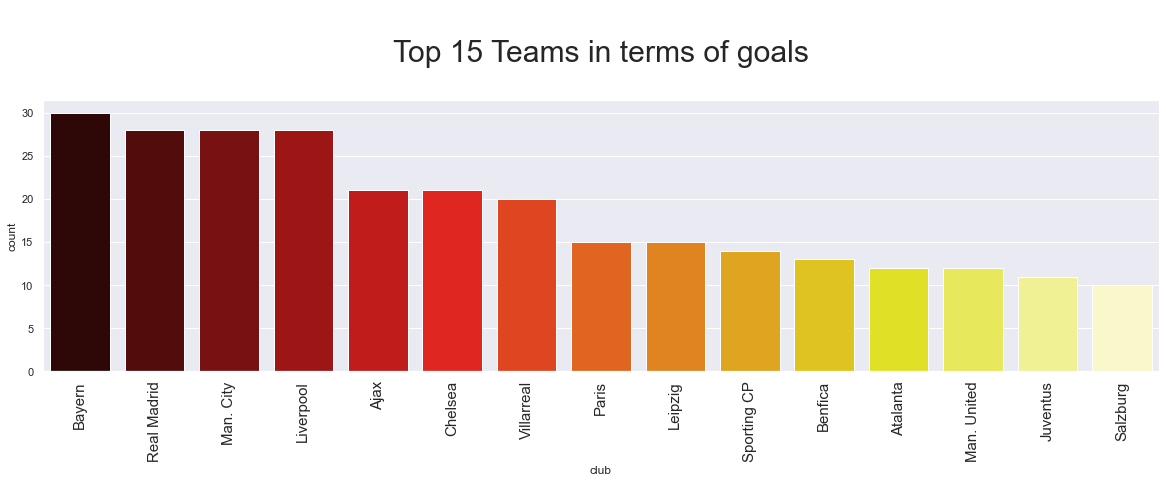

In [16]:
g1=ks.groupby('club')['goals'].agg('sum').reset_index(name='count').sort_values('count',ascending=False)
g1=g1[:15]
sns.set(rc={'figure.figsize':(20,5)})
plt.xticks(fontsize=15,rotation='vertical')
p=sns.barplot(x="club", y="count", data=g1,palette="hot",capsize=2)
p.axes.set_title("\nTop 15 Teams in terms of goals\n",fontsize=30);

- Bayern leads followed by two finalists.

## Types of Goals Scored

In [17]:
gl_sum = pd.DataFrame(gl.sum(numeric_only = True),).T[["right_foot","left_foot","headers","others"]]
gl_sum=gl_sum.T
fig = px.pie(gl_sum, values=0, names=gl_sum.index, title=' Goal types analysis (How scored)', color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

- Almost half of he goals are scored by right foot, the other half is almost 2/3 left foot and 1/3 headers.

In [18]:
gl_sum = pd.DataFrame(gl.sum(numeric_only = True),).T[["inside_area","outside_areas","penalties"]]
gl_sum=gl_sum.T
fig = px.pie(gl_sum, values=0, names=gl_sum.index, title='Goal types analysis (From where scored)')
fig.show()

- Most goals are scored from inside the box.
- Outside of and penalties are about same.

C:\Users\Ahmed Hussain\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, '\nGoals per playing position\n')

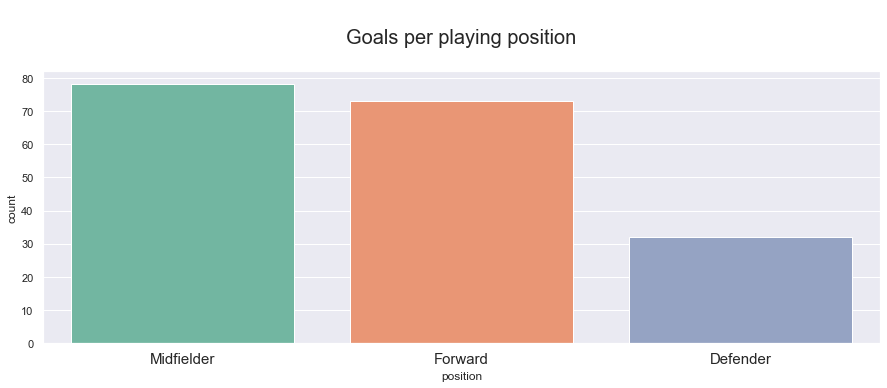

In [19]:
sns.set(rc={'figure.figsize':(15,5)})
plt.xticks(fontsize=15)
p=sns.countplot(gl['position'],hue_order=gl.groupby('position'),order=gl.position.value_counts().sort_values(ascending=False).index,palette="Set2")
p.axes.set_title("\nGoals per playing position\n",fontsize=20)

- Midfielders scored more goals then forwards.

# Attacking Analysis

## Dribblers

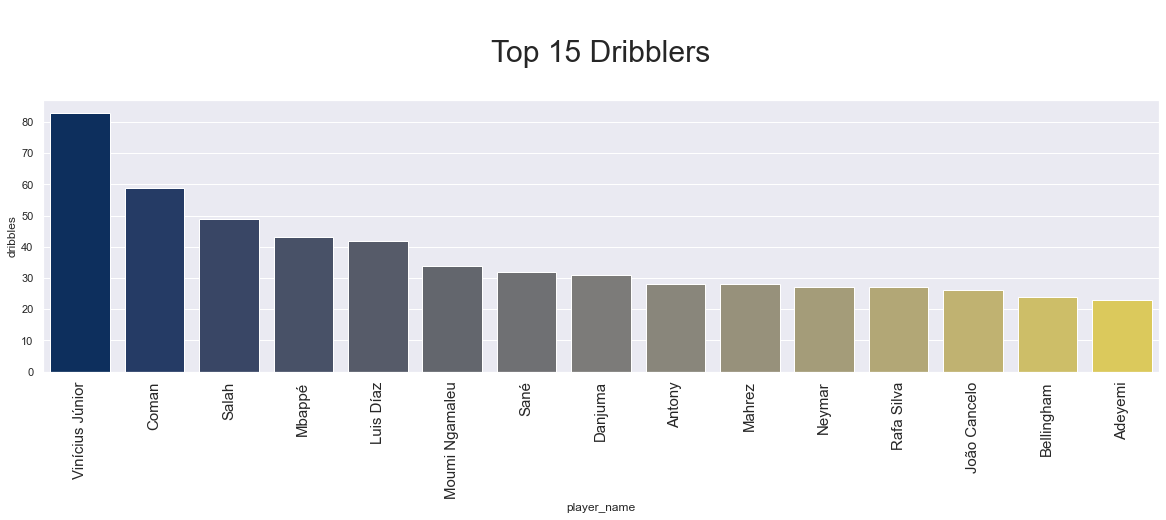

In [20]:
atkg=atkg.sort_values(by='dribbles',ascending=False)
t=atkg[:15]
sns.set(rc={'figure.figsize':(20,5)})
plt.xticks(fontsize=15,rotation='vertical')
p=sns.barplot(x="player_name", y="dribbles", data=t,palette="cividis",capsize=2)
p.axes.set_title("\nTop 15 Dribblers\n",fontsize=30);

- Vinicius Junior leads the list.

## Team Dribbles

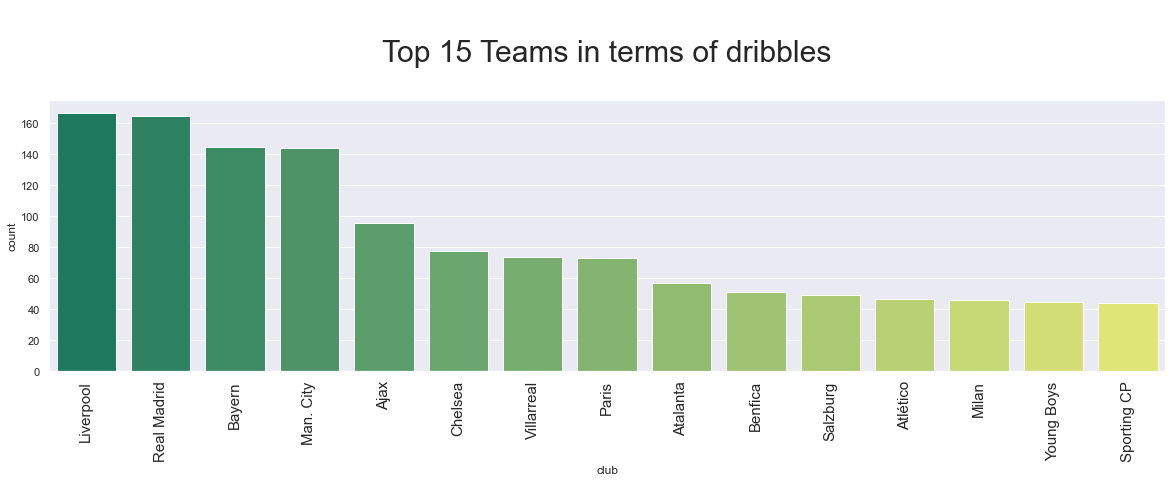

In [21]:
g1=atkg.groupby('club')['dribbles'].agg('sum').reset_index(name='count').sort_values('count',ascending=False)
g1=g1[:15]
sns.set(rc={'figure.figsize':(20,5)})
plt.xticks(fontsize=15,rotation='vertical')
p=sns.barplot(x="club", y="count", data=g1,palette="summer",capsize=2)
p.axes.set_title("\nTop 15 Teams in terms of dribbles\n",fontsize=30);

- Finalists leads the chart of the most dribbles by a team.

## Corner Takers

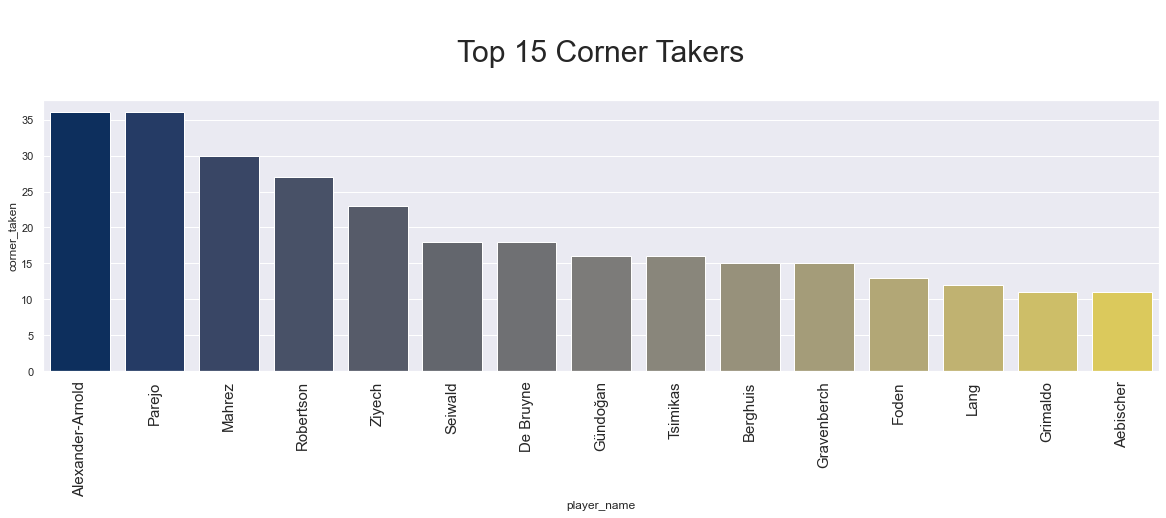

In [22]:
atkg=atkg.sort_values(by='corner_taken',ascending=False)
t=atkg[:15]
sns.set(rc={'figure.figsize':(20,5)})
plt.xticks(fontsize=15,rotation='vertical')
p=sns.barplot(x="player_name", y="corner_taken", data=t,palette="cividis",capsize=2)
p.axes.set_title("\nTop 15 Corner Takers\n",fontsize=30);

# Defence Analysis

## Ball recovery analysis

In [28]:
g1=dfn.groupby('position')['balls_recoverd'].agg('sum').reset_index(name='count').sort_values('count',ascending=False)
sns.set(rc={'figure.figsize':(10,10)})
fig = px.pie(g1, values="count", names=g1.position, title='Ball recovery analysis')
fig.show()

- Defenders are doing well, but forwards are also contributng in recovering balls now-a-days.

## Tackles won-loss ratio

In [29]:
gl_sum = pd.DataFrame(dfn.sum(numeric_only = True),).T[["t_won","t_lost"]]
gl_sum=gl_sum.T
fig = px.pie(gl_sum, values=0, names=gl_sum.index, title='Tackle WON vs LOST',color_discrete_sequence=px.colors.sequential.YlOrRd)
fig.show()

- Most of the tackles are lost. Not quality defending.

## Clearence

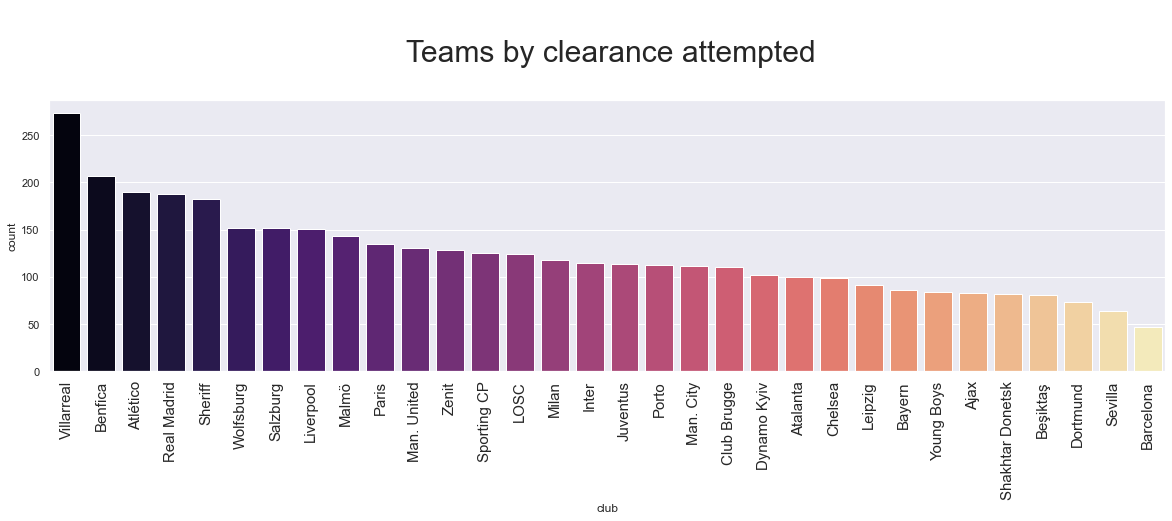

In [25]:
g1=dfn.groupby('club')['clearance_attempted'].agg('sum').reset_index(name='count').sort_values('count',ascending=False)
sns.set(rc={'figure.figsize':(20,5)})
plt.xticks(fontsize=15,rotation='vertical')
p=sns.barplot(x="club", y="count", data=g1,palette="magma",capsize=2)
p.axes.set_title("\n Teams by clearance attempted\n",fontsize=30);

- Villareal leads the list atttempting most clearences.

## Club with successful tackles

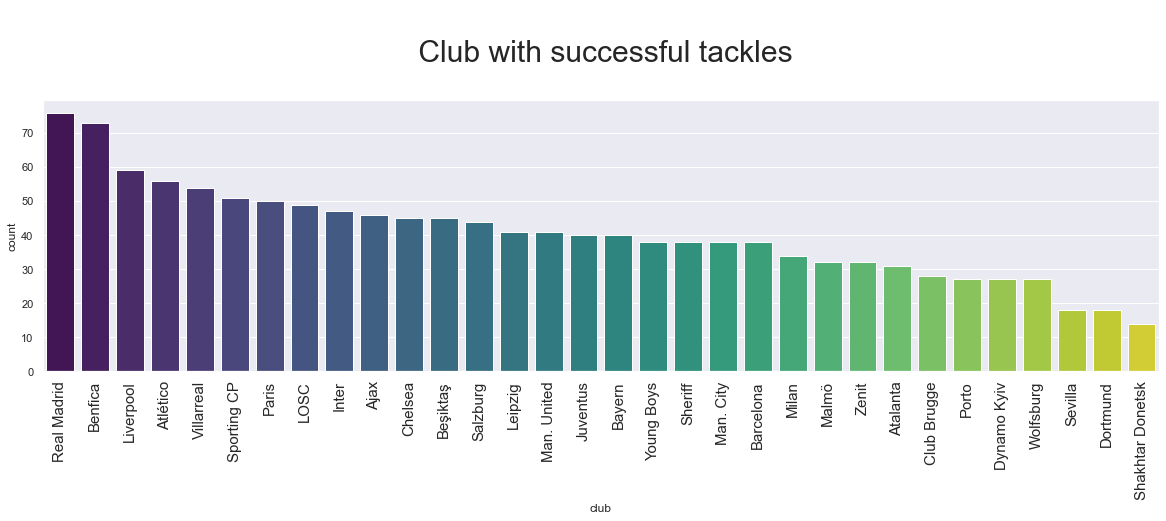

In [26]:
g1=dfn.groupby('club')['t_won'].agg('sum').reset_index(name='count').sort_values('count',ascending=False)
sns.set(rc={'figure.figsize':(20,5)})
plt.xticks(fontsize=15,rotation='vertical')
p=sns.barplot(x="club", y="count", data=g1,palette="viridis",capsize=2)
p.axes.set_title("\n Club with successful tackles\n",fontsize=30);

## Top 15 defender by ranking

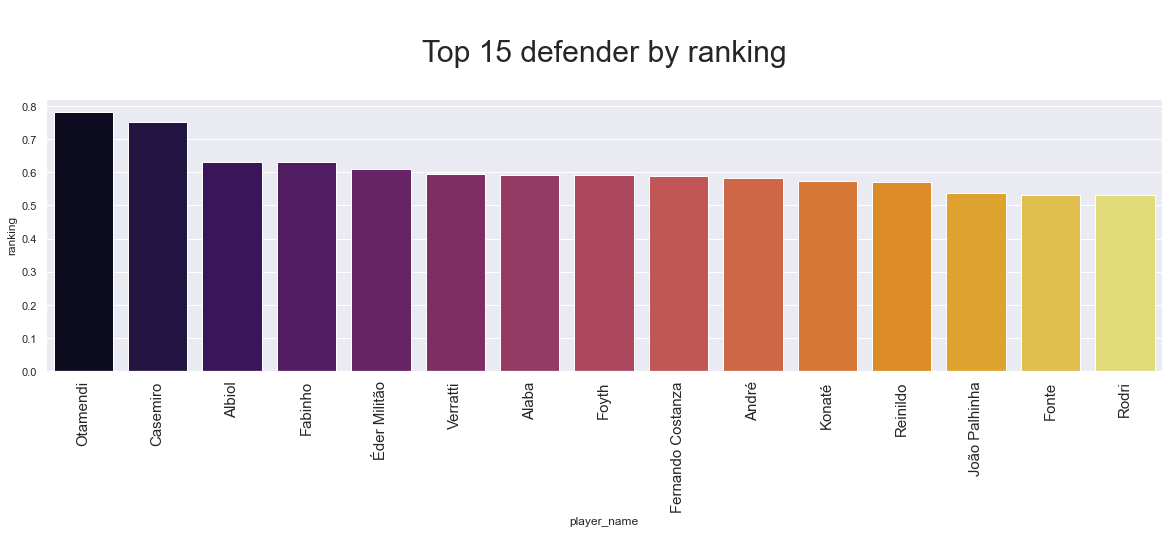

In [27]:
dfn['ranking']=(dfn['balls_recoverd']/dfn['balls_recoverd'].max())*0.3+(dfn['tackles']/dfn['tackles'].max())*0.3+(dfn['t_won']/dfn['tackles'])*0.2+(dfn['t_won']/dfn['t_won'].max())*0.1+(dfn['clearance_attempted']/dfn['clearance_attempted'].max())*0.1
dfnx=dfn.sort_values('ranking',ascending=False)
dfnx=dfnx[:15]
plt.xticks(fontsize=15,rotation='vertical')
p=sns.barplot(x="player_name", y="ranking", data=dfnx,palette="inferno",capsize=2)
p.axes.set_title("\n Top 15 defender by ranking \n",fontsize=30);

# Attacking Attempts Analysis

In [30]:
gl_sum = pd.DataFrame(atm.sum(numeric_only = True),).T[["on_target","off_target","blocked"]]
gl_sum=gl_sum.T
fig = px.pie(gl_sum, values=0, names=gl_sum.index, title='Attacking Attempts Analysis - Success rate : on_target vs off_target vs blockedT',color_discrete_sequence=px.colors.sequential.YlOrRd)
fig.show()

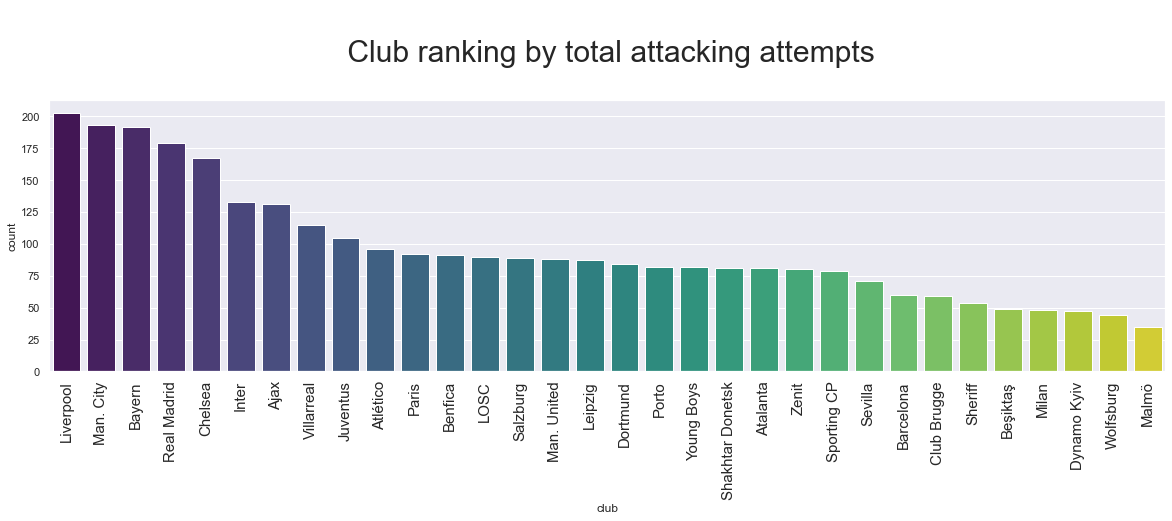

In [29]:
g1=atm.groupby('club')['total_attempts'].agg('sum').reset_index(name='count').sort_values('count',ascending=False)
sns.set(rc={'figure.figsize':(20,5)})
plt.xticks(fontsize=15,rotation='vertical')
p=sns.barplot(x="club", y="count", data=g1,palette="viridis",capsize=2)
p.axes.set_title("\n Club ranking by total attacking attempts\n",fontsize=30);

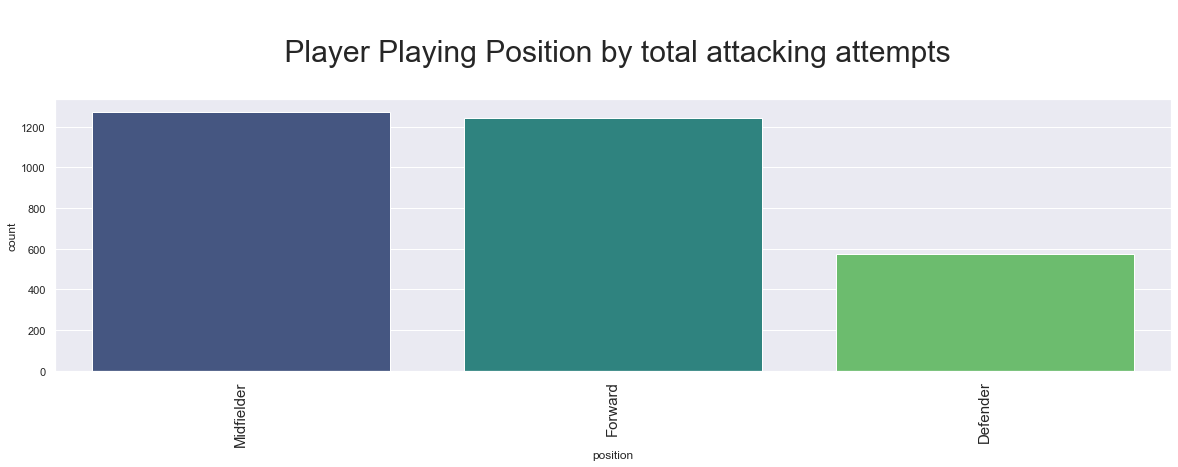

In [30]:
g1=atm.groupby('position')['total_attempts'].agg('sum').reset_index(name='count').sort_values('count',ascending=False)
sns.set(rc={'figure.figsize':(20,5)})
plt.xticks(fontsize=15,rotation='vertical')
p=sns.barplot(x="position", y="count", data=g1,palette="viridis",capsize=2)
p.axes.set_title("\n Player Playing Position by total attacking attempts\n",fontsize=30);

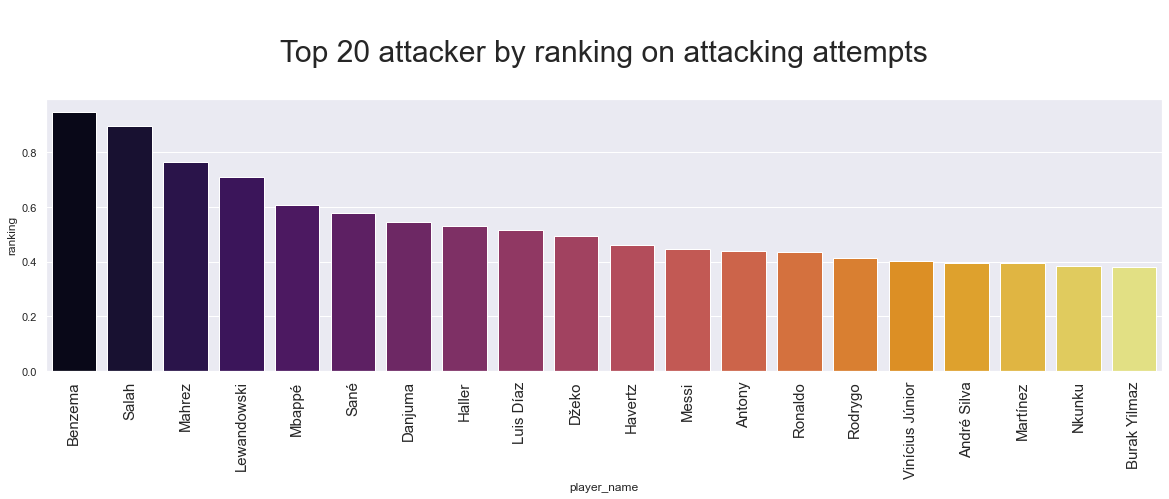

In [31]:
atm['ranking']=(atm['total_attempts']/atm['total_attempts'].max())*0.5+(atm['on_target']/atm['on_target'].max())*0.3+(atm['on_target']/atm['total_attempts'].max())*0.4-(atm['off_target']/atm['total_attempts'])*0.2
dfnx=atm.sort_values('ranking',ascending=False)
dfnx=dfnx[:20]
plt.xticks(fontsize=15,rotation='vertical')
p=sns.barplot(x="player_name", y="ranking", data=dfnx,palette="inferno",capsize=2)
p.axes.set_title("\n Top 20 attacker by ranking on attacking attempts \n",fontsize=30);

In [31]:
gl_sum = pd.DataFrame(gk.sum(numeric_only = True),).T[["saved","conceded"]]
gl_sum=gl_sum.T
fig = px.pie(gl_sum, values=0, names=gl_sum.index, title='Overall GK Performance',color_discrete_sequence=px.colors.sequential.Reds)
fig.show()

# Goal Keeper Analysis

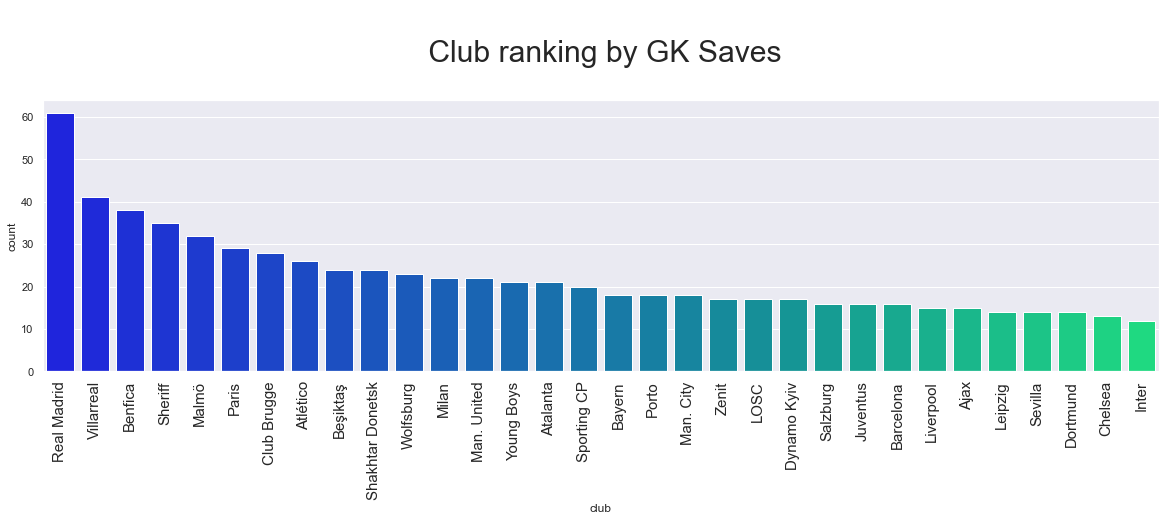

In [33]:
g1=gk.groupby('club')['saved'].agg('sum').reset_index(name='count').sort_values('count',ascending=False)
sns.set(rc={'figure.figsize':(20,5)})
plt.xticks(fontsize=15,rotation='vertical')
p=sns.barplot(x="club", y="count", data=g1,palette="winter",capsize=2)
p.axes.set_title("\n Club ranking by GK Saves\n",fontsize=30);

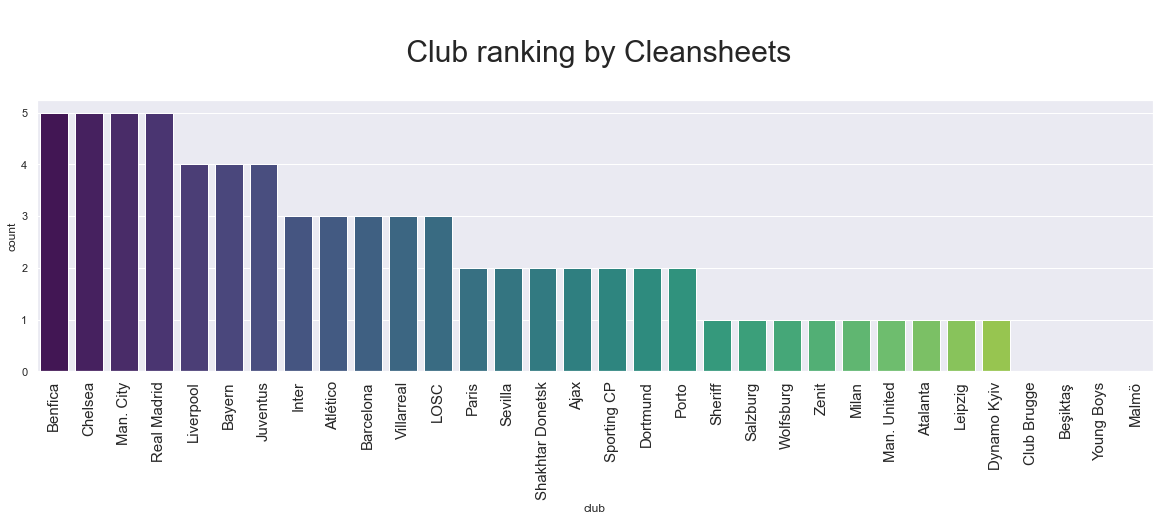

In [34]:
g1=gk.groupby('club')['cleansheets'].agg('sum').reset_index(name='count').sort_values('count',ascending=False)
sns.set(rc={'figure.figsize':(20,5)})
plt.xticks(fontsize=15,rotation='vertical')
p=sns.barplot(x="club", y="count", data=g1,palette="viridis",capsize=2)
p.axes.set_title("\n Club ranking by Cleansheets\n",fontsize=30);

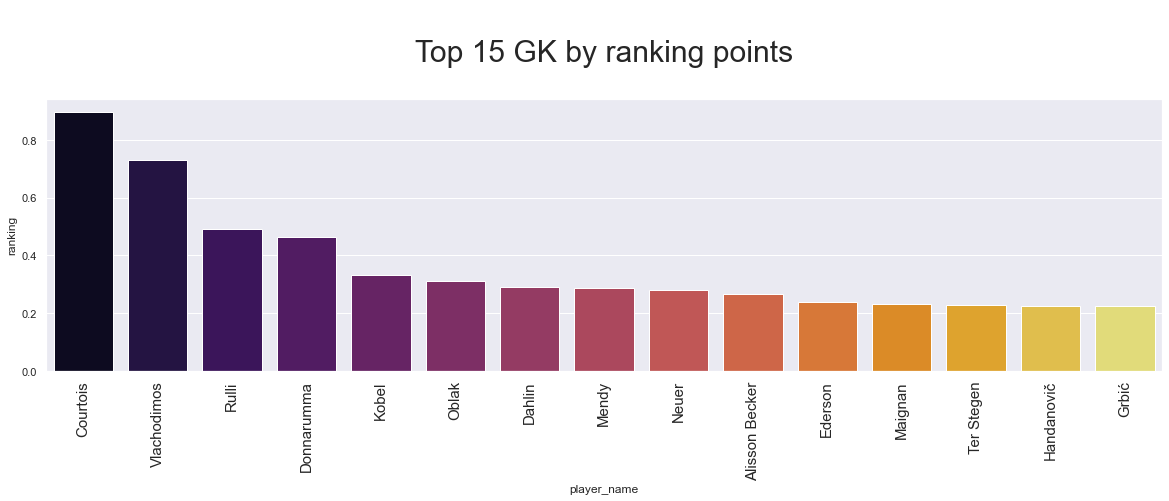

In [36]:
gk['ranking']=(gk['saved']/gk['saved'].max())*0.4-(gk['conceded']/(gk['conceded']+gk['saved']))*0.2+(gk['saved_penalties']/gk['saved_penalties'].max())*0.2+(gk['cleansheets']/gk['cleansheets'].max())*0.3+(gk['punches made']/gk['punches made'].max())*0.1
    
    
dfnx=gk.sort_values('ranking',ascending=False)
dfnx=dfnx[:15]
plt.xticks(fontsize=15,rotation='vertical')
p=sns.barplot(x="player_name", y="ranking", data=dfnx,palette="inferno",capsize=2)
p.axes.set_title("\n Top 15 GK by ranking points \n",fontsize=30);

# Ball Distribution

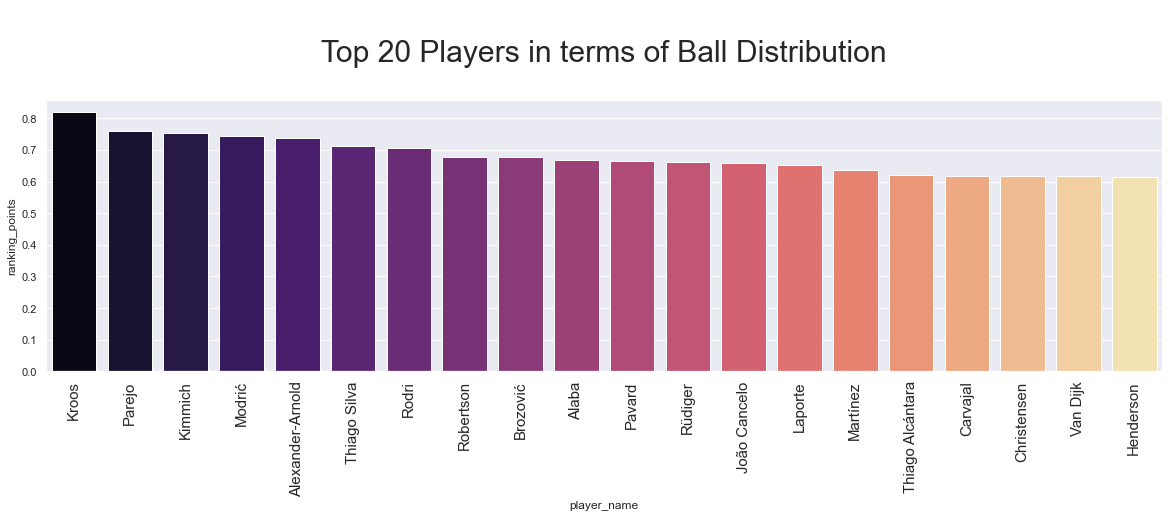

In [37]:
dis['ranking_points']=(dis['pass_attempted']/dis['pass_attempted'].max())*0.2 +(dis['pass_completed']/dis['pass_completed'].max())*0.2 +(dis['pass_accuracy']/100)*0.3 +(dis['cross_attempted']/dis['cross_attempted'].max())*0.1 +(dis['freekicks_taken']/dis['freekicks_taken'].max())*0.1 +(dis['cross_accuracy']/100)*0.1 
    
dfnx=dis.sort_values('ranking_points',ascending=False)
dfnx=dfnx[:20]
plt.xticks(fontsize=15,rotation='vertical')
p=sns.barplot(x="player_name", y="ranking_points", data=dfnx,palette="magma",capsize=2)
p.axes.set_title("\n Top 20 Players in terms of Ball Distribution \n",fontsize=30);


In [38]:
g1=dis.groupby('club')["pass_attempted","pass_completed","cross_attempted","cross_complted","freekicks_taken"].agg('sum').reset_index()

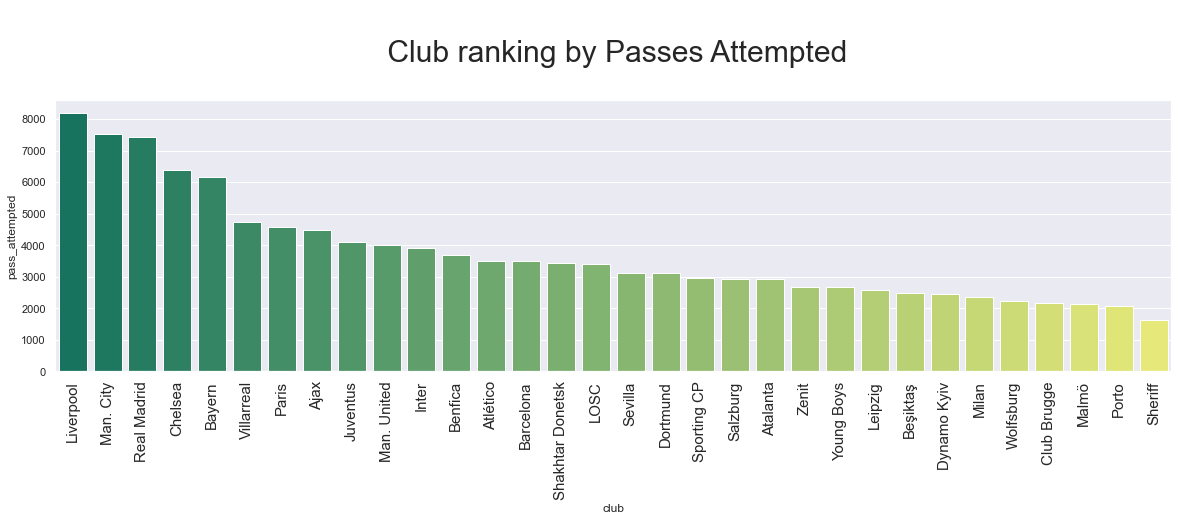

In [39]:
g1=g1.sort_values('pass_attempted',ascending=False)
sns.set(rc={'figure.figsize':(20,5)})
plt.xticks(fontsize=15,rotation='vertical')
p=sns.barplot(x="club", y="pass_attempted", data=g1,palette="summer",capsize=2)
p.axes.set_title("\n Club ranking by Passes Attempted\n",fontsize=30);

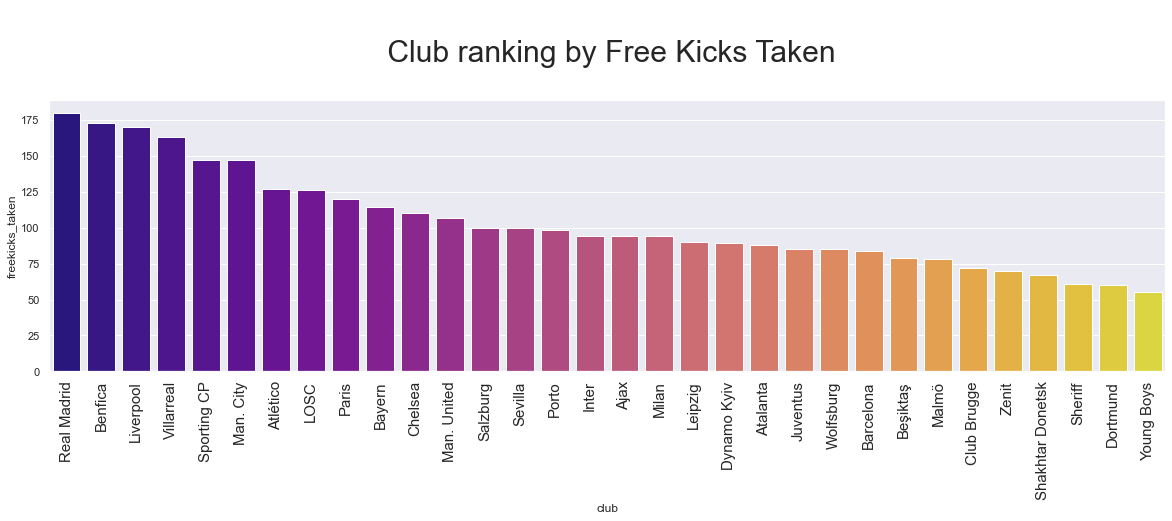

In [40]:
g1=g1.sort_values('freekicks_taken',ascending=False)
sns.set(rc={'figure.figsize':(20,5)})
plt.xticks(fontsize=15,rotation='vertical')
p=sns.barplot(x="club", y="freekicks_taken", data=g1,palette="plasma",capsize=2)
p.axes.set_title("\n Club ranking by Free Kicks Taken\n",fontsize=30);

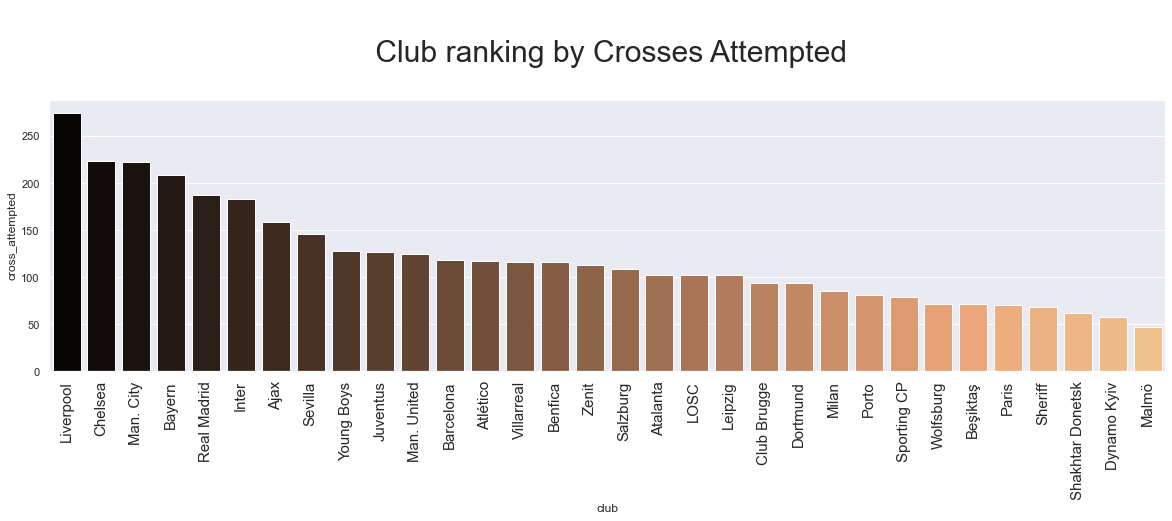

In [41]:
g1=g1.sort_values('cross_attempted',ascending=False)
sns.set(rc={'figure.figsize':(20,5)})
plt.xticks(fontsize=15,rotation='vertical')
p=sns.barplot(x="club", y="cross_attempted", data=g1,palette="copper",capsize=2)
p.axes.set_title("\n Club ranking by Crosses Attempted\n",fontsize=30);

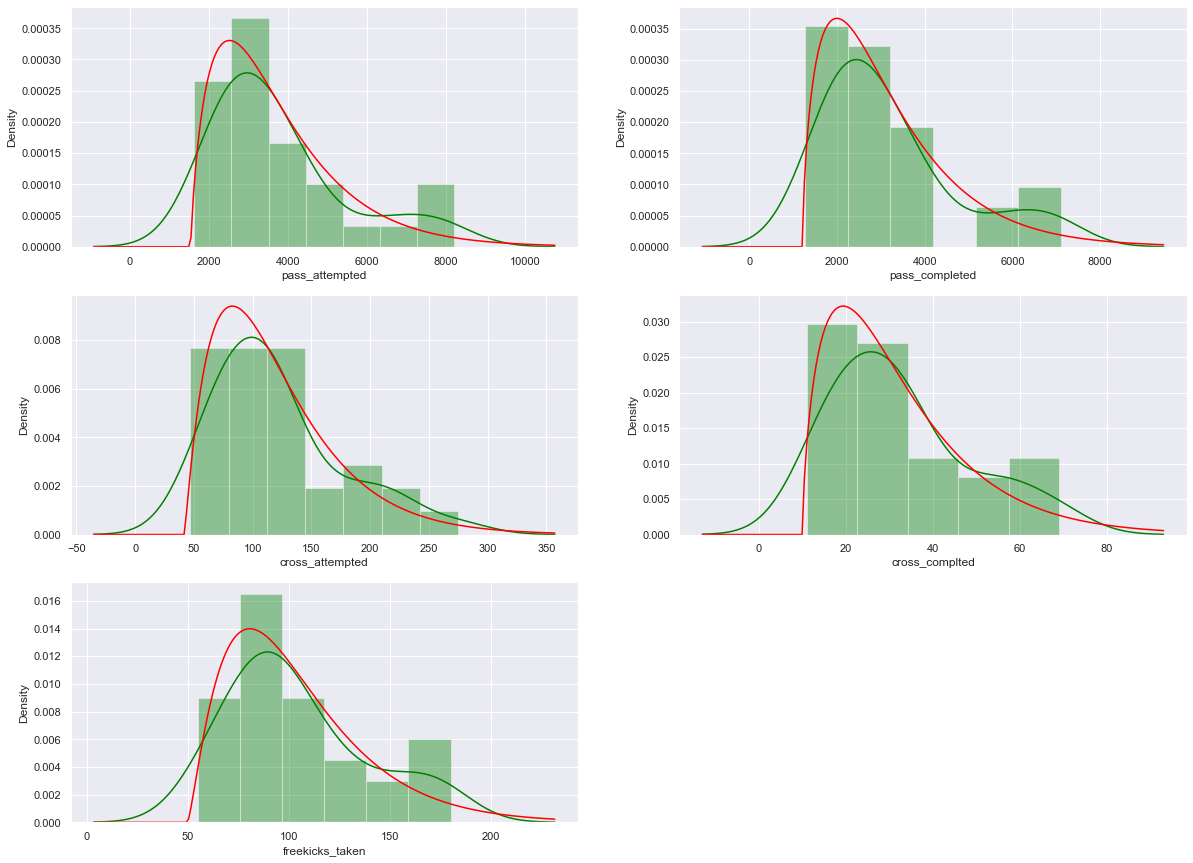

In [42]:
sns.set(rc={'figure.figsize':(20,15)})
for i, column in enumerate(["pass_attempted","pass_completed","cross_attempted","cross_complted","freekicks_taken"], 1):
    plt.subplot(3,2,i)
    p=sns.distplot(g1[column],color='green',fit_kws={"color":"red"},fit=stats.gamma, label="label 1")

In [43]:
g2=dsp.groupby('club')["fouls_committed","fouls_suffered","red","yellow"].agg('sum').reset_index()

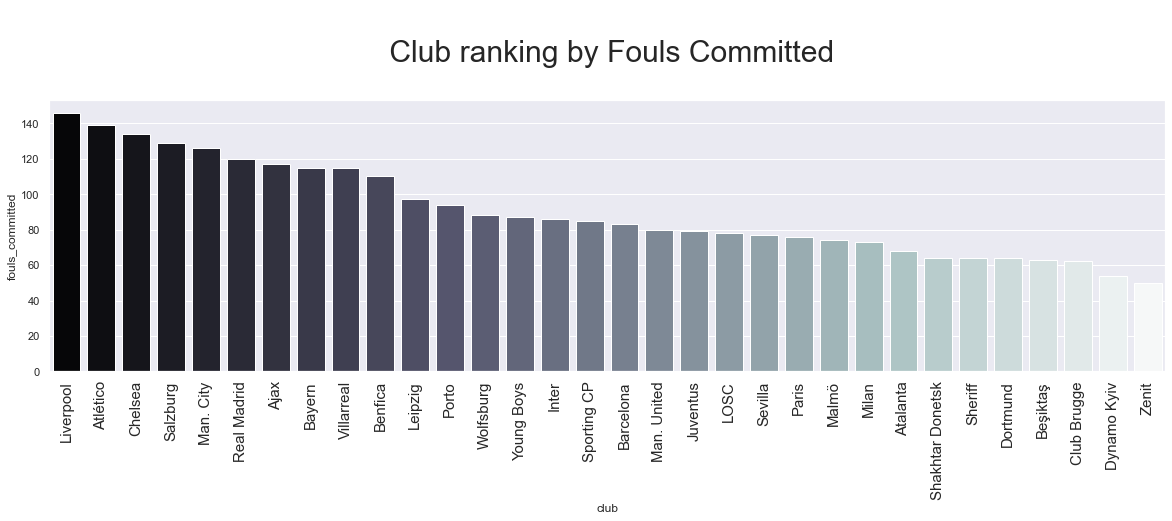

In [44]:
g2=g2.sort_values('fouls_committed',ascending=False)
sns.set(rc={'figure.figsize':(20,5)})
plt.xticks(fontsize=15,rotation='vertical')
p=sns.barplot(x="club", y="fouls_committed", data=g2,palette="bone",capsize=2)
p.axes.set_title("\n Club ranking by Fouls Committed\n",fontsize=30);

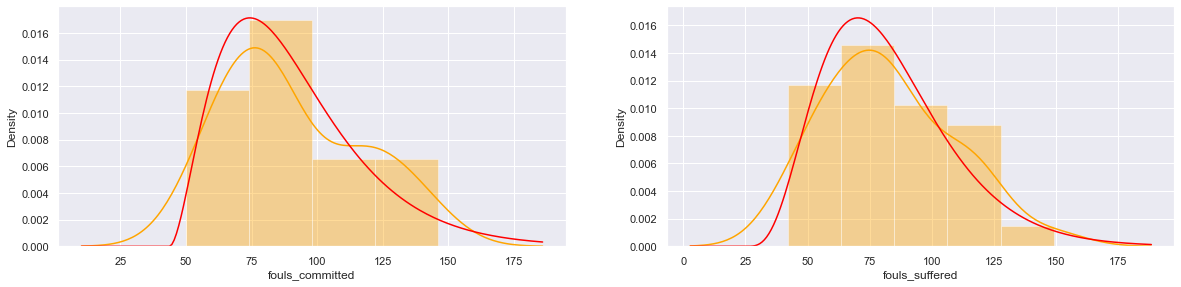

In [45]:
sns.set(rc={'figure.figsize':(20,15)})
for i, column in enumerate(["fouls_committed","fouls_suffered"], 1):
    plt.subplot(3,2,i)
    p=sns.distplot(g2[column],color='orange',fit_kws={"color":"red"},fit=stats.gamma, label="label 1")

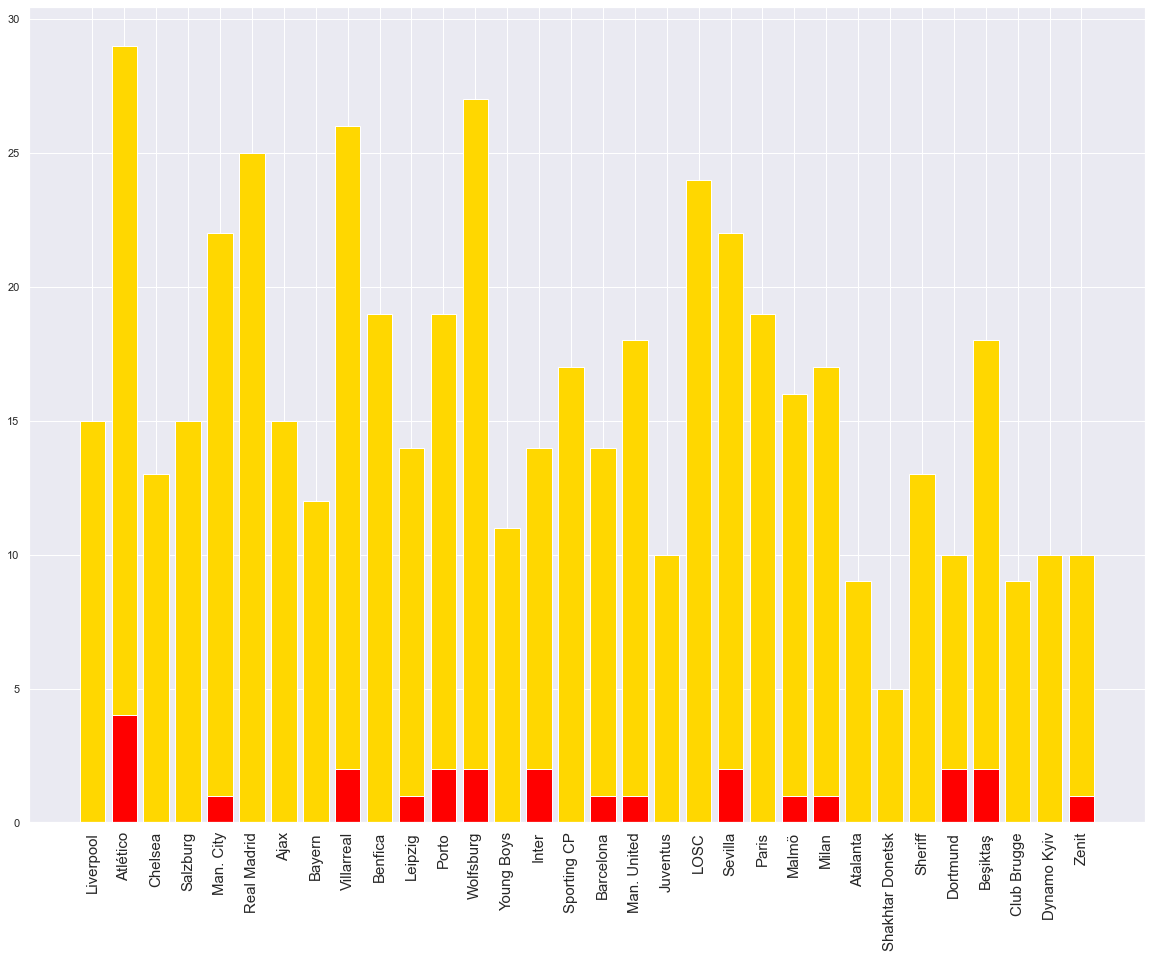

In [46]:
plt.xticks(fontsize=15,rotation='vertical')
plt.bar(g2['club'], g2["yellow"], color='red')
plt.bar(g2['club'], g2["red"], bottom=g2["yellow"], color='gold')
plt.show()

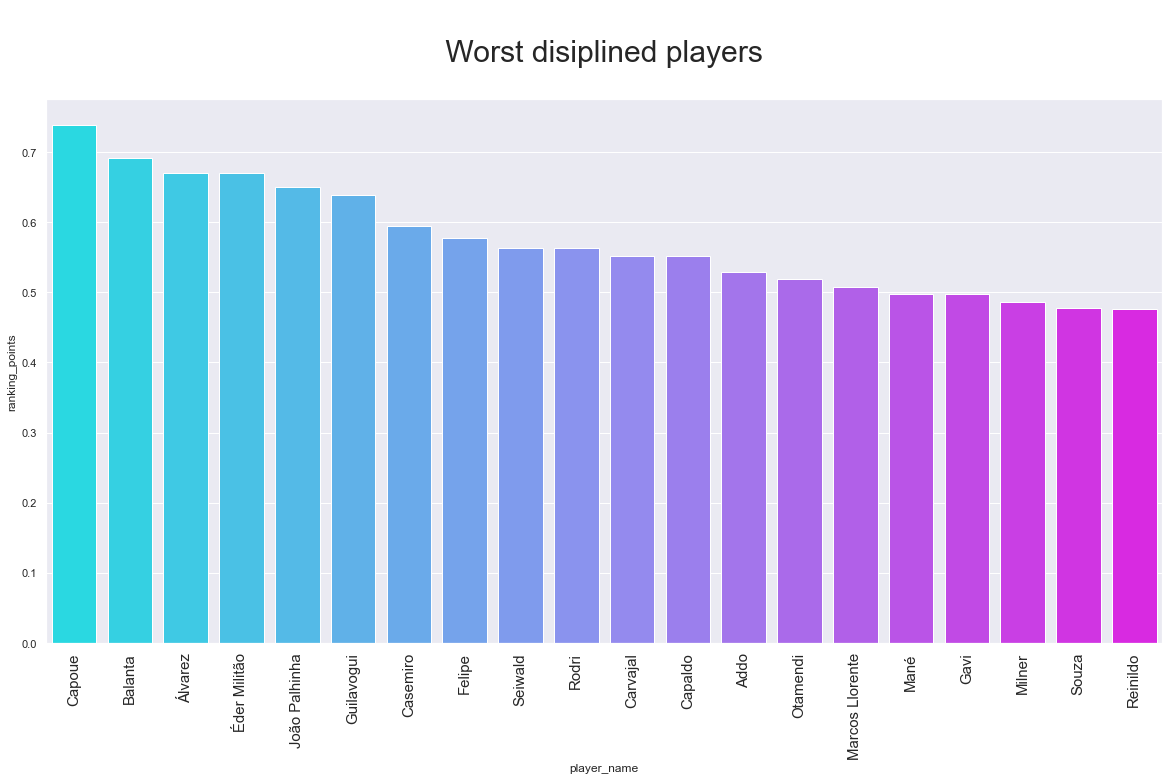

In [47]:
dsp['ranking_points']=(dsp['fouls_committed']/dsp['fouls_committed'].max())*0.5+(dsp['red']/dsp['red'].max())*0.3+(dsp['yellow']/dsp['yellow'].max())*0.2
sns.set(rc={'figure.figsize':(20,10)})
dfnx=dsp.sort_values('ranking_points',ascending=False)
dfnx=dfnx[:20]
plt.xticks(fontsize=15,rotation='vertical')
p=sns.barplot(x="player_name", y="ranking_points", data=dfnx,palette="cool",capsize=2)
p.axes.set_title("\n Worst disiplined players \n",fontsize=30);